In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings 
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv('Abalone_Project.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
df.shape

(4177, 9)

In [14]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We have 4177 rows and 9 columns including the target column.

In [40]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])


In [41]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,14
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,6
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,8
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,6


In [42]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,8.933445
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.222790
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,7.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,8.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,10.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


In [43]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

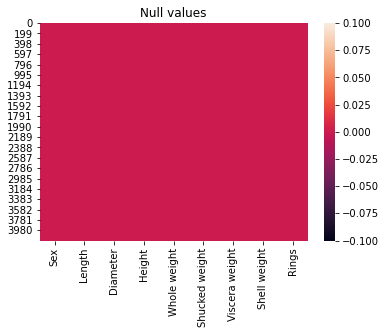

In [44]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

There are no null values in the dataset

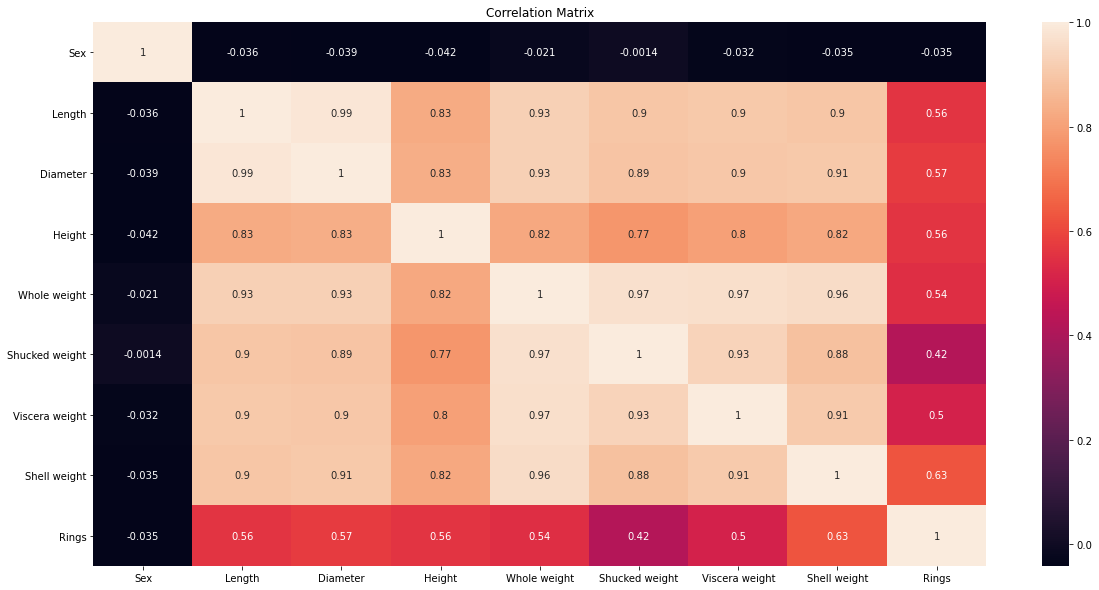

In [45]:
corr_mat=df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [46]:
corr_matrix=df.corr()
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627717
Diameter          0.574773
Height            0.557625
Length            0.556849
Whole weight      0.540473
Viscera weight    0.503939
Shucked weight    0.420948
Sex              -0.034546
Name: Rings, dtype: float64

In [47]:
x= df.drop("Rings",axis=1)
y= df["Rings"]

In [48]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [49]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [50]:
df_new.skew()

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [51]:
x=df_new

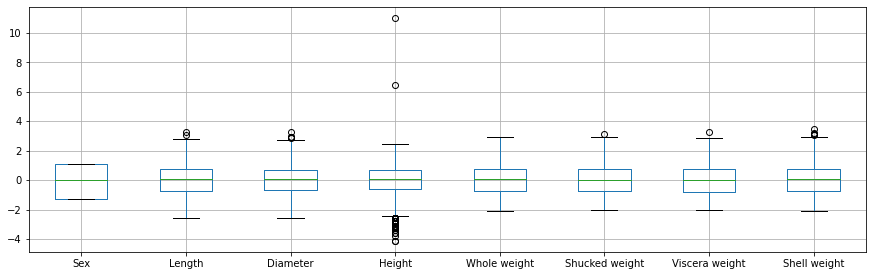

In [52]:
x.iloc[:,0:9].boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=0.20)
plt.show()

In [54]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([ 163,  166,  236,  237,  238,  306,  694,  719,  720,  891, 1174,
        1209, 1257, 1417, 1428, 1428, 1763, 1987, 2051, 2108, 2161, 2169,
        2171, 2172, 2334, 2381, 2711, 3190, 3902, 3996], dtype=int64),
 array([7, 7, 3, 3, 3, 3, 3, 3, 3, 7, 3, 5, 3, 3, 1, 2, 6, 3, 3, 7, 7, 3,
        3, 3, 1, 3, 3, 3, 3, 3], dtype=int64))

In [55]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,14
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,6
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,8
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,9
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,6
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,7
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,19
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,15
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,8
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,18


In [56]:
df_new_z.shape

(4148, 9)

In [57]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.24880382775119617 on Random_state 1
Best accuracy is 0.2503987240829346 on Random_state 2
Best accuracy is 0.2607655502392344 on Random_state 4
Best accuracy is 0.27910685805422647 on Random_state 6
Best accuracy is 0.28149920255183414 on Random_state 8
Best accuracy is 0.28548644338118023 on Random_state 31
Best accuracy is 0.2942583732057416 on Random_state 47
Best accuracy is 0.29505582137161085 on Random_state 58


In [59]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=58)

In [60]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.29505582137161085
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  6 13  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 10 14  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1 12 17 33 10  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1 15 52 38  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  5 22 71 46 14  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  2 15 35 86 60 12  0  2  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  7 21 55 77 27  1  8  0  0  1  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  3  8 25 58 43  0  5  0  1  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  2  7 18 26 22  0  7  0  0  1  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  5 18 16  0  6  0  0  1  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1 

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.18181818181818182
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  4  5  9  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  1  3  9  6  5  3  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  3 12 16 21 12  6  3  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  1  6 27 29 27 15  2  2  2  2  1  0  1  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  2 13 28 51 27 16 13  3  2  1  2  2  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  1  3 14 38 47 46 30 13  7  5  3  2  2  1  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0 14 23 43 31 36 12 15  5  6  0  4  5  1  1  1  0  0  1  0
   0  0]
 [ 0  0  0  0  1  6 14 22 37 20 16 11  4  2  2  1  2  1  1  3  0  0  0  0
   0  1]
 [ 0  0  0  0  0  5 10  7 16 13  9  9  5  2  3  1  1  1  1  0  0  0  1  0
   0  0]
 [ 0  0  0  0  0  1  6  6  5 12  4  4  4  4  1  2  0  2  1  0  0  0

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.24082934609250398
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  1  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  3  6  9  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2 10 10  7  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2 11 19 30  9  2  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1 31 37 30  9  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1 12 31 58 41 14  1  2  1  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  2 18 37 61 63 23  3  2  0  2  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  2  4 22 51 58 36  9 11  1  2  1  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  4  8 28 46 35  8 13  0  1  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  4  6 14 20 22  6  6  2  0  3  0  1  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  6  6 10 14  5  5  3  1  0  0  0  1  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  1 

In [63]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

0.284688995215311
[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  2 17  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 11 15  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 14 22 26  7  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1 16 53 30 13  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  6 28 66 45 14  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  3 19 35 91 51 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  5 22 72 71 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  1  3  6 34 59 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  2  6 28 23 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  2  2 16 20 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  1  2

We are getting highest accuracy with LogisticRegression (30%) but it can be due to overfitting also so we will check cross validation scores

In [64]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of LogisticRegression model : ",scr.mean())

Cross validation score of LogisticRegression model :  0.26885568575767127


In [65]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of DecisionTressClassifier model : ",scr.mean())

Cross validation score of DecisionTressClassifier model :  0.1970352118729049


In [66]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of RandomForestClassifier model : ",scr.mean())

Cross validation score of RandomForestClassifier model :  0.24443887344927367


In [67]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model : ",scr.mean())

Cross validation score of SVC model :  0.2659805747356961


There is no difference in accuracy and cross validation score is for RandomForestClassifier, so this is our best model.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters={'max_depth': np.arange(2,15),
           'criterion':['gini','entropy']}

In [70]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [71]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [72]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [73]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [74]:
accuracy_score(y_test,GCV_pred)

0.2607655502392344

In [75]:
import joblib
joblib.dump(GCV.best_estimator_,"AbaloneRFC.pkl")

['AbaloneRFC.pkl']